# CFAR10

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
# Load the CIFAR10 dataset
cifar10 = tf.keras.datasets.cifar10.load_data()

(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [4]:
X_train.shape

(45000, 32, 32, 3)

In [5]:
len(np.unique(y_train))

10

##### Build a DNN :

* 20 hidden layers , 100 neurons each
* Swish Activation
* He Initialization


In [6]:
tf.random.set_seed(42)

SwishHeDense = partial(
    tf.keras.layers.Dense,
    activation = "swish",
    kernel_initializer="he_normal"
)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(SwishHeDense(100))

* Nadam Optimization
* Early Stopping
* Softmax Output layer

In [7]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [8]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics = ['accuracy']
)

In [9]:
from pathlib import Path

In [10]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_model",
                                                         save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = Path() / "cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [11]:
#%load_ext tensorboard
#%tensorboard --logdir=./cifar10_logs

In [12]:
model.fit(X_train, y_train, 
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 130s 78ms/step - loss: 5.2169 - accuracy: 0.1531 - val_loss: 2.3435 - val_accuracy: 0.1998
Epoch 2/100
1407/1407 [==============================] - 61s 44ms/step - loss: 2.1353 - accuracy: 0.2291 - val_loss: 2.1840 - val_accuracy: 0.2090
Epoch 3/100
1407/1407 [==============================] - 60s 43ms/step - loss: 1.9868 - accuracy: 0.2764 - val_loss: 2.0115 - val_accuracy: 0.2774
Epoch 4/100
1407/1407 [==============================] - 65s 46ms/step - loss: 1.8996 - accuracy: 0.3096 - val_loss: 1.9432 - val_accuracy: 0.3064
Epoch 5/100
1407/1407 [==============================] - 88s 63ms/step - loss: 1.8303 - accuracy: 0.3366 - val_loss: 1.8388 - val_accuracy: 0.3432
Epoch 6/100
1407/1407 [==============================] - 63s 45ms/step - loss: 1.7772 - accuracy: 0.3571 - val_loss: 1.7933 - val_accuracy: 0.3510
Epoch 7/100
1407/1407 [==============================] - 65s 46ms/step - loss: 1.7308 - accuracy: 0.3759 - val_loss: 

In [13]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 2s 13ms/step - loss: 1.5099 - accuracy: 0.4602


[1.509885311126709, 0.4602000117301941]

* Add Batch Normalization

In [15]:
tf.random.set_seed(42)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_bn_model", save_best_only=True)

run_index = 1
run_logdir = Path() / "cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, 
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 106s 59ms/step - loss: 2.0391 - accuracy: 0.2521 - val_loss: 2.2831 - val_accuracy: 0.2122
Epoch 2/100
1407/1407 [==============================] - 78s 55ms/step - loss: 1.7758 - accuracy: 0.3606 - val_loss: 1.9911 - val_accuracy: 0.3030
Epoch 3/100
1407/1407 [==============================] - 78s 55ms/step - loss: 1.6774 - accuracy: 0.3998 - val_loss: 1.7921 - val_accuracy: 0.3544
Epoch 4/100
1407/1407 [==============================] - 75s 54ms/step - loss: 1.6107 - accuracy: 0.4248 - val_loss: 1.6584 - val_accuracy: 0.4020
Epoch 5/100
1407/1407 [==============================] - 82s 59ms/step - loss: 1.5567 - accuracy: 0.4472 - val_loss: 1.6249 - val_accuracy: 0.4262
Epoch 6/100
1407/1407 [==============================] - 52s 37ms/step - loss: 1.5082 - accuracy: 0.4628 - val_loss: 1.7285 - val_accuracy: 0.4024
Epoch 7/100
1407/1407 [==============================] - 78s 56ms/step - loss: 1.4589 - accuracy: 0.4828 - val_loss: 

[1.397704005241394, 0.5062000155448914]

* Replace Batch Normalization w/ SELU
* Use LeCun Normal Initialization

In [16]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cifar10_selu_model", save_best_only=True)
run_index = 1 
run_logdir = Path() / "cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 54s 31ms/step - loss: 1.9249 - accuracy: 0.3093 - val_loss: 1.8804 - val_accuracy: 0.3206
Epoch 2/100
1407/1407 [==============================] - 54s 39ms/step - loss: 1.7118 - accuracy: 0.3915 - val_loss: 1.7681 - val_accuracy: 0.3352
Epoch 3/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.6141 - accuracy: 0.4295 - val_loss: 1.6617 - val_accuracy: 0.4056
Epoch 4/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.5460 - accuracy: 0.4519 - val_loss: 1.6483 - val_accuracy: 0.4280
Epoch 5/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.4876 - accuracy: 0.4757 - val_loss: 1.5932 - val_accuracy: 0.4416
Epoch 6/100
1407/1407 [==============================] - 46s 33ms/step - loss: 1.4405 - accuracy: 0.4936 - val_loss: 1.5230 - val_accuracy: 0.4636
Epoch 7/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.3996 - accuracy: 0.5090 - val_loss: 1

[1.4839905500411987, 0.5070000290870667]

* Regularize the model w/ alpha dropout

In [17]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint( "cifar10_alpha_dropout_model", save_best_only=True)
run_index = 1 
run_logdir = Path() / "cifar10_logs" / f"run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, 
          epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 53s 31ms/step - loss: 1.9111 - accuracy: 0.3175 - val_loss: 1.7171 - val_accuracy: 0.3842
Epoch 2/100
1407/1407 [==============================] - 46s 33ms/step - loss: 1.6697 - accuracy: 0.4104 - val_loss: 1.6957 - val_accuracy: 0.4052
Epoch 3/100
1407/1407 [==============================] - 47s 33ms/step - loss: 1.5700 - accuracy: 0.4486 - val_loss: 1.6736 - val_accuracy: 0.4164
Epoch 4/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.5057 - accuracy: 0.4706 - val_loss: 1.5666 - val_accuracy: 0.4572
Epoch 5/100
1407/1407 [==============================] - 38s 27ms/step - loss: 1.4525 - accuracy: 0.4906 - val_loss: 1.6405 - val_accuracy: 0.4514
Epoch 6/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.4047 - accuracy: 0.5091 - val_loss: 1.5170 - val_accuracy: 0.4828
Epoch 7/100
1407/1407 [==============================] - 33s 23ms/step - loss: 1.3599 - accuracy: 0.5271 - val_loss: 1

[1.4744670391082764, 0.4970000088214874]

* MCDropOut

In [18]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

In [19]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

In [20]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 [==============================] - 2s 15ms/step


0.4978

* Use 1cycleScheduler

In [25]:
K = tf.keras.backend
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [26]:
class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

In [27]:
import math

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 12s 26ms/step - loss: nan - accuracy: 0.1732


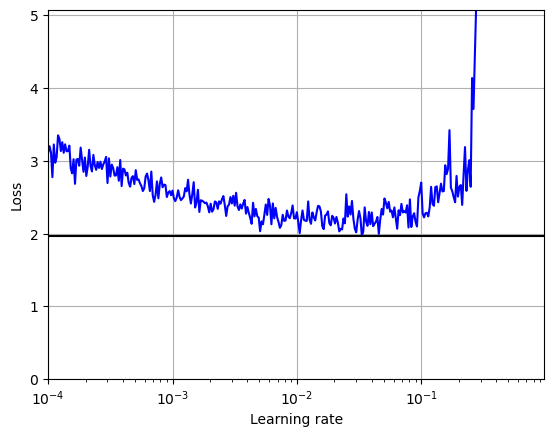

In [29]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [31]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 9s 20ms/step - loss: 2.0562 - accuracy: 0.2847 - val_loss: 1.7639 - val_accuracy: 0.3830
Epoch 2/15
352/352 [==============================] - 7s 20ms/step - loss: 1.7468 - accuracy: 0.3831 - val_loss: 1.6203 - val_accuracy: 0.4250
Epoch 3/15
352/352 [==============================] - 9s 26ms/step - loss: 1.6126 - accuracy: 0.4293 - val_loss: 1.6629 - val_accuracy: 0.4266
Epoch 4/15
352/352 [==============================] - 6s 17ms/step - loss: 1.5377 - accuracy: 0.4581 - val_loss: 1.6860 - val_accuracy: 0.4184
Epoch 5/15
352/352 [==============================] - 7s 19ms/step - loss: 1.4896 - accuracy: 0.4743 - val_loss: 1.6208 - val_accuracy: 0.4438
Epoch 6/15
352/352 [==============================] - 8s 23ms/step - loss: 1.4488 - accuracy: 0.4864 - val_loss: 1.6076 - val_accuracy: 0.4428
Epoch 7/15
352/352 [==============================] - 6s 18ms/step - loss: 1.4089 - accuracy: 0.5031 - val_loss: 1.5911 - val_accuracy: 0.4606